In [1]:
# Importing necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from time import sleep
%matplotlib inline

In [ ]:
name=[]
temp=[]
for item1 in classification_report_list_dup:
    name.append(item1[0])
    temp.append(item1[1].split("\n\n"))
    #print(name)
    #print(temp)
    #for item in temp:
        #temp=item.replace(" ","Index",)
    #print("\nItem1 :",item1[1])
    #for item2 in item1:
        #print("\nItem2 :",item2)#.split("\n"))


for model_report_entry in temp:
    print("Given Model Entry :\n\n",model_report_entry,'\n')
    for model_entries in model_report_entry:
        if "\n" not in model_entries:
            pass
        else:
            print("Given Model Entry :\n",model_entries)
            modified_entry=[]
            print("\nBefore modification :\n",model_entries,"\n\n")
            modified_entry=model_entries.split("\n")
            print("Modified Entry\n",modified_entry,"\n\n")
            temp[model_report_entry].remove(model_entries)
            temp[model_report_entry].append(modified_entry)
            print("Modified Entry :",modified_entry)
    print("After modification :\n",model_report_entry)

In [ ]:
#####################################################################
####################################################################

###################################################################

##################################################################
###################################################################
#Function for setting up the data such that Quartiles are given out in proper
#format for further processing. This can be our choice here. Can be called from
#anywhere or within other function.

def Quartiles_data_setting(data_given, columns_given=False):
    datafr=data_given
    Quartiles=data_given.describe()
    #print(columns_given)
    #print(Quartiles)
    if columns_given:
        Quartiles=Quartiles[columns_given]
        #print(Quartiles)
        return Quartiles
    else:
        return Quartiles
        

In [2]:
#Reading the Data from the given file
data=pd.read_csv("Data - Parkinsons.csv")

In [3]:
data['status'].values.any()

True

In [4]:
#Creating a new correlation dataframe for further analysis.
data_correlation=data.corr() #Priting out the Correlation Table
#data.corr()

In [5]:
#dropping the name column for further analysis
data_name_dropped=data.drop("name",axis=1)
#data_name_dropped["status"].convert_dtype("int")
data_name_dropped


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:

##############################################################################
##############################################################################

#Checking for the plot type choice. You can add as many types of plots are you
#want here with proper key and it will work out appropriately.

def plot_type(key):       #You can add more options here depending on your choice
    if key =="boxplot":
        return sns.boxplot
    if key=="distplot":
        return sns.distplot
    
##################################################################################
##################################################################################


##################################################################################


##################################################################################
##################################################################################

#This is the function that actually plots different distribution plots separately
# and fixing the canvas situation for proper presentation.

def plotting_map(data_name_dropped,no_of_cols=1,fig_size=(20,6),key="distplot"):
    #plt.figure(figsize=fig_size) #The actual size
    #colors=["red","green","yellow","blue","orange"]
    columns=list(data_name_dropped.columns)
    cols=no_of_cols
    temp_var=0
    col_len=len(columns)
    offset=0
    count=0
    temp_var=int(col_len/cols)+1
    colors=sns.color_palette()
    if col_len>cols:
            rows=temp_var
            offset=0
    else:
            rows=1
    for row in range(rows):
        plt.figure(figsize=fig_size)
        for var in range(cols):
            #print(cols)
            #print("row :",row+1,"var :",var+1,"offset+var :",var+offset,"temp_var :",temp_var)
            #print(columns[var+offset])
            #print (row,cols,var,temp_var,col_len,offset)
            #test=data_name_dropped[columns[var+offset]]
            #print(test)
            #print("\n Loop ended \n")
            plt.subplot(row+1, cols, var+1)
            plt.title(columns[var+offset])
            plot_chosen=plot_type(key)
            plot_chosen(data_name_dropped[columns[var+offset]],color=colors[var])
            count+=1
            #print("loop count",count)
            if var==cols-1:
                #print("offest before :",offset)
                offset+=cols
                #print("offset after :",offset)
                #print("\n")
            if count==col_len:
                #cols=(rows+1)*cols
                #print("cols :",cols)
                #print("out of range index : ")
                break
            #plt.show()
        #print(row,cols,var,temp_var,col_len,offset)
        
################################################################
################################################################


################################################################


################################################################
################################################################

#creating a better canvas by proper conditioning and supply of the data to the 
#the above function.

def neat_plot_univariate(dataframe_given,no_of_columns_selected,fig_dim=(18,6),plot_kind="distplot"):
    column_ind=0 
    for index in range(0,len(dataframe_given.columns),no_of_columns_selected) :
        #index_2=index
        #index_2+=no_of_columns_selected
        #plotting_map()
        column_ind=column_ind+no_of_columns_selected
        #print("\n",index,column_ind,"\n")
        plotting_map(dataframe_given.iloc[:,index:column_ind],no_of_cols=no_of_columns_selected,fig_size=fig_dim,key=plot_kind)

#################################################################
#################################################################

#actually plotting the data
#neat_plot_univariate(data_name_dropped,no_of_columns_selected=4,fig_dim=(18,6),plot_kind="boxplot")



In [7]:
Access_data=data_name_dropped.describe()
print(Access_data.index)

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')


# Eliminating Outlier

In [15]:
#Extreme Values are eliminated from the Data here using the functions properly.

##############################################################################
#############################################################################

########################################################################


#############################################################################
#################################################################################

#A Very handy function to tweak the threshold and settinf or percentile settings for
#higher analysis of all kinds.

def percentile_threshold_tweaking(data_fr_received,Quartiles_passed,percentile_threshold=(25,50,75)):
    #data_fr_received=data_received
    #print(data_fr_received)
    for columns in data_fr_received.columns:
        data_fr_received[columns]["25%"]=data_fr_received[columns].quantile(percentile_threshold[0]/100)
        Quartiles_passed.rename({'25%':'{}'.format(percentile_threshold[0])+"%"}, inplace = True)
        data_fr_received[columns]["75%"]=data_fr_received[columns].quantile(percentile_threshold[2]/100)
        Quartiles_passed.rename({'75%':'{}'.format(percentile_threshold[2])+"%"}, inplace = True)
        data_fr_received[columns]["50%"]=data_fr_received[columns].quantile(percentile_threshold[1]/100)
        Quartiles_passed.rename({'50%':'{}'.format(percentile_threshold[1])+"%"}, inplace = True)
    return Quartiles_passed


#####################################################################
####################################################################

###################################################################

##################################################################
###################################################################
#Function for setting up the data such that Quartiles are given out in proper
#format for further processing. This can be our choice here. Can be called from
#anywhere or within other function.

#Note : Though I have used the default describe() method to access percentile, we can alter it
#by the function here but not used.

def Quartiles_data_setting(data_given,columns_given=False,percentile_threshold_given=False):
    data_fr=data_given
    Quartiles=data_given.describe()
    if columns_given:
        Quartiles=Quartiles[columns_given]
        column_flag=columns_given
    else:
        column_flag=data_given.columns
    if percentile_threshold_given: #User can define their own function on to decide what is the threshold
        Quartiles=percentile_threshold_tweaking(data_fr[column_flag],percentile_threshold=percentile_threshold_given,Quartiles_passed=Quartiles)
        #print(columns_given)
        #print(Quartiles)
        #print(Quartiles)
        return Quartiles
    else:
        return Quartiles
        
#####################################################################
####################################################################

###################################################################

##################################################################
###################################################################

#A Function designed such that we get a list of the indexes and their nature of outlying 
#for a chosen set of columns which might have outliers. Designed such that we might take
# a decision whether or not to exclude the outliers, whether or not they make any significant
#effect on the data, and to what extent do they make a difference, on everything. We can also
# decide on what side of the spectrum of outliers we might want to eliminate.

def index_list_for_outliers (dataframe_given,Quartiles_given_by_user=False):
    #passing and processing data so that proper processing is done for plotting
    df_ready=dataframe_given.copy()
    #original_columns=dataframe_given.columns
    #print(Quartiles_given_by_user)
    Quartiles_given=Quartiles_given_by_user
    #if Quartiles_given_by_user.empty:
        #Quartiles_given=Quartiles_given_by_user
    #else:
        #Quartiles_given=Quartiles_data_setting(df_ready,Quartiles_given_by_user,percentile_threshold_given=percentile_threshold)
    Quartiles_index=Quartiles_given_by_user.T.index
    Quartiles_columns=Quartiles_given_by_user.index
    #print(Quartiles_columns)
    #print(Quartiles_given_by_user["spread1"]["65%"])
    #print(Quartiles_index)
    location_index=[]
    percentile_threshold_set=[str(Quartiles_columns[4]),str(Quartiles_columns[5]),str(Quartiles_columns[6])]
    #print(percentile_threshold_set)
    for index1 in Quartiles_index:
        temp_list=[]
        for loc_ind_value in df_ready[index1].index:
            #temp_list=[]
            flag_temp=None
            if df_ready[index1][loc_ind_value]<Quartiles_given[index1][percentile_threshold_set[0]]:
                temp_list.append(loc_ind_value)
                fomat=index1+"_Q1"
                flag_temp=True
            elif df_ready[index1][loc_ind_value]>Quartiles_given[index1][percentile_threshold_set[2]]:
                fomat=index1+"_Q3"
                flag_temp=True
            else:
                flag_temp=False
                pass
            if loc_ind_value not in temp_list:
                if flag_temp:
                    location_index.append({fomat:loc_ind_value})
    return location_index

#We can convert this into a dataframe for further wonderful analysis and more higher analysis.
#This generates an array in the format of "{<column>_<Quartile>:<index value of the particular Outlier>"
# we can modify the function to choose a threshold value by supplying percentile_threshold and appropriately
# modfying the Quartiles_given by giving 
            
#More higher level analysis can be done by declaring functions here and that is properly done in
#future projects.


            

#################################################################################
#################################################################################


#################################################################################


###################################################################################
##################################################################################

#The data frame supplied here is the dataframe that has the "name" column dropped.
# We can directly call here the function to give the columns so that their correlation
# is high with target column and has outliers.

exclusive_columns=["PPE","spread1"]

##############################################################################
##############################################################################

#Testing with the data below

#percentile_threshold_tweaking(data_name_dropped,Quartiles_passed=data_name_dropped.describe(),percentile_threshold=(30,60,80))
#Quartiles_data_setting(data_name_dropped,columns_given=exclusive_columns,percentile_threshold_given=(30,60,80))
index_list_for_outliers(data_name_dropped,Quartiles_given_by_user=Quartiles_data_setting(data_name_dropped,columns_given=exclusive_columns,percentile_threshold_given=(30,65,80)))

<ipython-input-15-2f7a0e10372f>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quartiles=percentile_threshold_tweaking(data_fr[column_flag],percentile_threshold=percentile_threshold_given,Quartiles_passed=Quartiles)
<ipython-input-15-2f7a0e10372f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fr_received[columns]["75%"]=data_fr_received[columns].quantile(percentile_threshold[2]/100)
<ipython-input-15-2f7a0e10372f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

[{'PPE_Q3': 0},
 {'PPE_Q3': 1},
 {'PPE_Q3': 2},
 {'PPE_Q3': 3},
 {'PPE_Q3': 4},
 {'PPE_Q3': 5},
 {'PPE_Q3': 9},
 {'PPE_Q3': 11},
 {'PPE_Q3': 17},
 {'PPE_Q3': 18},
 {'PPE_Q3': 19},
 {'PPE_Q3': 20},
 {'PPE_Q3': 21},
 {'PPE_Q3': 22},
 {'PPE_Q3': 23},
 {'PPE_Q3': 54},
 {'PPE_Q3': 55},
 {'PPE_Q3': 56},
 {'PPE_Q3': 57},
 {'PPE_Q3': 58},
 {'PPE_Q3': 59},
 {'PPE_Q3': 78},
 {'PPE_Q3': 79},
 {'PPE_Q3': 80},
 {'PPE_Q3': 81},
 {'PPE_Q3': 82},
 {'PPE_Q3': 89},
 {'PPE_Q3': 90},
 {'PPE_Q3': 97},
 {'PPE_Q3': 98},
 {'PPE_Q3': 99},
 {'PPE_Q3': 100},
 {'PPE_Q3': 101},
 {'PPE_Q3': 102},
 {'PPE_Q3': 112},
 {'PPE_Q3': 115},
 {'PPE_Q3': 117},
 {'PPE_Q3': 136},
 {'PPE_Q3': 137},
 {'PPE_Q3': 140},
 {'PPE_Q3': 146},
 {'PPE_Q3': 147},
 {'PPE_Q3': 148},
 {'PPE_Q3': 149},
 {'PPE_Q3': 150},
 {'PPE_Q3': 151},
 {'PPE_Q3': 152},
 {'PPE_Q3': 157},
 {'PPE_Q3': 164},
 {'spread1_Q3': 0},
 {'spread1_Q3': 1},
 {'spread1_Q3': 2},
 {'spread1_Q3': 3},
 {'spread1_Q3': 4},
 {'spread1_Q3': 5},
 {'spread1_Q3': 9},
 {'spread1_Q3': 

In [95]:
outlier_data_frame=pd.DataFrame(index_list_for_outliers(data_name_dropped,Quartiles_given_by_user=Quartiles_data_setting(data_name_dropped,columns_given=exclusive_columns,percentile_threshold_given=(30,65,80))))

C:\Users\shesh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-15-2f7a0e10372f>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quartiles=percentile_threshold_tweaking(data_fr[column_flag],percentile_threshold=percentile_threshold_given,Quartiles_passed=Quartiles)
<ipython-input-15-2f7a0e10372f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

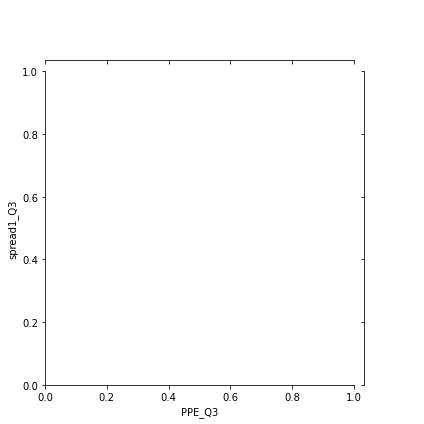

In [10]:
sns.jointplot(x=outlier_data_frame["PPE_Q3"],y=outlier_data_frame["spread1_Q3"],kind="kde")

In [11]:
data_name_dropped[["PPE","spread1"]].corr()

,PPE,spread1
PPE,1.000000,0.962435
spread1,0.962435,1.000000


In [12]:
outlier_data_frame.fillna("",inplace=True)

In [16]:
#generating a bigger index list that will show the outliers of any or all chosen columns and will drop as requested.

# First we will generated columns of our interest here, and restrict ourselves only to the targeted column and correlated
#columns instead of going for whole dataframe.

exclusive_columns=exclusive_columns #borrowing from the previous analysis example, but can be modified here. 

Quartiles_choss=Quartiles_data_setting(data_name_dropped,columns_given=exclusive_columns,percentile_threshold_given=(25,50,75))

outlier_data_frame_new=pd.DataFrame(index_list_for_outliers(data_name_dropped,Quartiles_given_by_user=Quartiles_choss))

<ipython-input-15-2f7a0e10372f>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quartiles=percentile_threshold_tweaking(data_fr[column_flag],percentile_threshold=percentile_threshold_given,Quartiles_passed=Quartiles)
<ipython-input-15-2f7a0e10372f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fr_received[columns]["75%"]=data_fr_received[columns].quantile(percentile_threshold[2]/100)
<ipython-input-15-2f7a0e10372f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [55]:
outlier_data_frame_new=outlier_data_frame_new.fillna('')

In [79]:
#Here we will develop two functions

#######################################################################
######################################################################

#This will export the index items as a list so that we can drop the particular items from the data entries.
#But it requires a clean "NaN" items deleted dataframe as input

#While supplying the below function with an outlier dataframe, we have to make sure
#that we supply on those columns from it which we actually want to drop.


def index_list_extreme_values(outlier_data_frame):
    #print(type(outlier_data_frame))
    export_list=[]
    for series1 in outlier_data_frame:
        #print(series1)
        #print("end of ",series1.Name)
        for values in outlier_data_frame[series1]:
            if values=="''":
                pass
            #print("here values:",values)
            if values in export_list:
                pass
            else:
                export_list.append(values)
    while '' in export_list:
        export_list.remove('')
    return [int(i) for i in export_list]

#######################################################################
#######################################################################

######################################################################

#######################################################################
#######################################################################

# A Very simple function that eliminates the outliers from all the columns chosen
# and conditioned as a supply given.

def drop_the_items_data(dataframe_given,passed_index_list):
    dataframe_given=dataframe_given.copy()
    #print(dataframe_given)
    #print(dataframe_given.drop(passed_index_list))
    for ind_value in passed_index_list:
        dataframe_given.drop(ind_value,inplace=True)
    return dataframe_given
    
        
    

##########################################################################
#########################################################################


##########################################################################


#######################################################################
#######################################################################

indxxx=index_list_extreme_values(outlier_data_frame_new)
data_frame_clean_outliers=drop_the_items_data(data_name_dropped,indxxx)

Let us now compare the dataframes of both dropped extemum ones and the original ones.


In [80]:
data_frame_clean_outliers  # Clean dataframe without outliers in those particular chosen columns

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
10,88.333,112.240,84.072,0.00505,0.00006,0.00254,0.00330,0.00763,0.02143,0.197,...,0.03237,0.01166,21.118,1,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
12,136.926,159.866,131.276,0.00293,0.00002,0.00118,0.00153,0.00355,0.01259,0.112,...,0.01968,0.00581,25.703,1,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [81]:
data_name_dropped # Original dataframe with outliers included.

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [85]:
relative_difference_corr = data_frame_clean_outliers.corr()-data_name_dropped.corr()

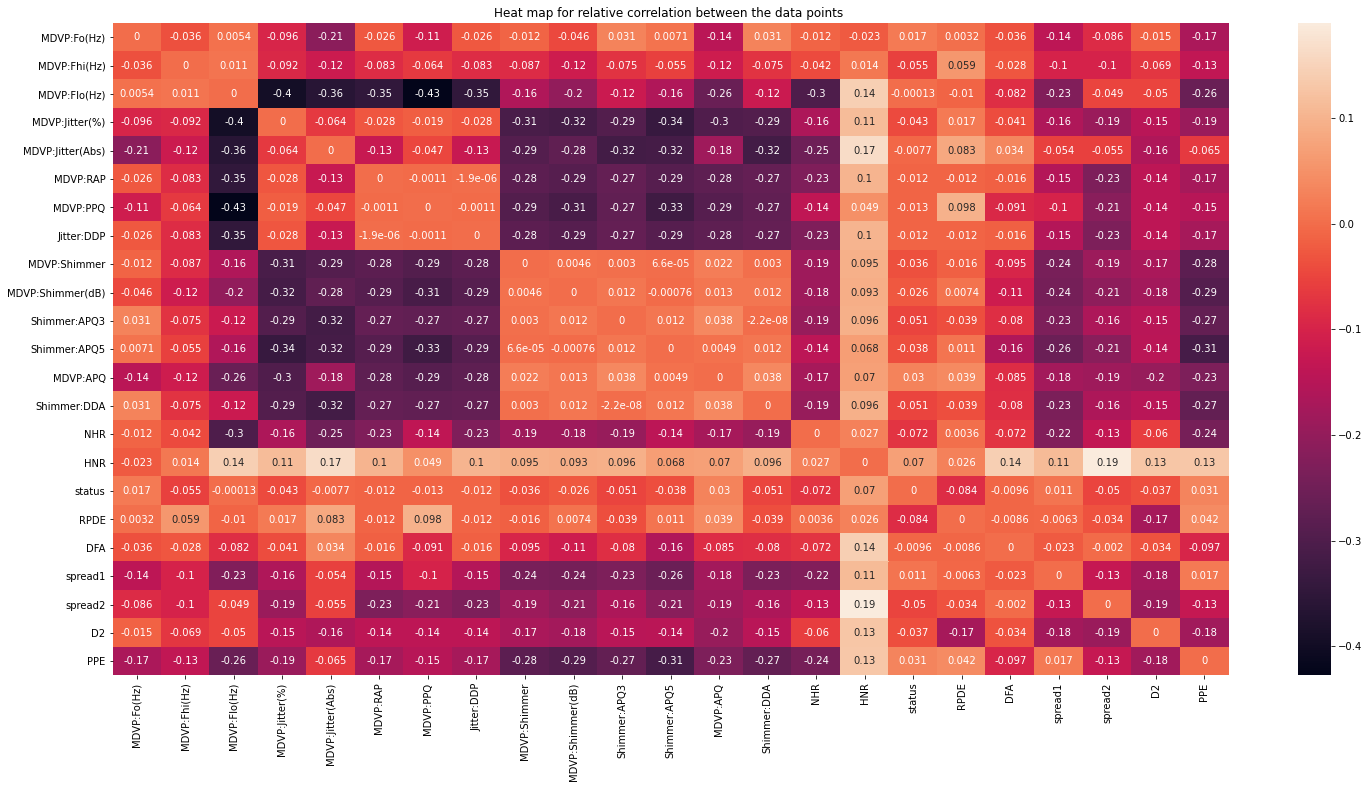

In [87]:
plt.figure(figsize=(25,12))
plt.title("Heat map for relative correlation between the data points ")
sns.heatmap(relative_difference_corr,annot=True)
plt.show()

In [88]:
# Taking correlation data for new dataframe without outliers for target column

relative_difference_corr["status"]

MDVP:Fo(Hz)         0.016581
MDVP:Fhi(Hz)       -0.054810
MDVP:Flo(Hz)       -0.000125
MDVP:Jitter(%)     -0.043029
MDVP:Jitter(Abs)   -0.007654
MDVP:RAP           -0.011667
MDVP:PPQ           -0.012639
Jitter:DDP         -0.011628
MDVP:Shimmer       -0.035936
MDVP:Shimmer(dB)   -0.026154
Shimmer:APQ3       -0.051023
Shimmer:APQ5       -0.037713
MDVP:APQ            0.029590
Shimmer:DDA        -0.051032
NHR                -0.071680
HNR                 0.070282
status              0.000000
RPDE               -0.083634
DFA                -0.009556
spread1             0.010953
spread2            -0.049965
D2                 -0.036967
PPE                 0.031301
Name: status, dtype: float64

Looks like the correlation ratio decreased in most cases implying that those outliers were holding a sway over the correlation earlier. Nevertheless the difference is very little. Hence it can be safely ignored.



In [98]:
Entries_clean=data_frame_clean_outliers.shape[0]
Entries_old=data_name_dropped.shape[0]

In [99]:
Entries_clean

141

In [101]:
Entries_old

195

In [104]:
(195-141)/195

0.27692307692307694

In [1]:
import numpy as np
example=[]
example=np.array(example)

In [4]:
example

array([], dtype=float64)

In [ ]:
print(df_confusion_LR)